In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yelp-reviews-dataset/yelp.csv


# Problem Statement
In today's digital age, online customer reviews have become a crucial aspect of business success, especially for e-commerce platforms and service providers. These reviews provide valuable insights into customer satisfaction, product quality, and service effectiveness. However, the vast volume of reviews makes it challenging for businesses to extract actionable insights manually. Additionally, fake reviews can distort perceptions, making it even harder to gauge genuine customer sentiment. Therefore, there is a need for an automated system to analyze customer reviews, detect fake reviews, and predict customer ratings based on review content.

# Goals and Objectives
The overarching objective of this project is to develop an automated, data-driven approach to understanding customer reviews. By analyzing sentiment, detecting fake reviews, and predicting ratings, the project aims to equip businesses with the insights needed to improve customer experiences, make informed decisions, and maintain the integrity of online review systems.

# The dataset contains the following columns:

-  business_id: ID of the business.
-  date: Date of the review.
-  review_id: Unique ID for the review.
-  stars: Star rating given by the customer (target variable for prediction).
-  text: The review content (feature for predicting ratings).
-  type: Type of entry (all seem to be "review").
-  user_id: ID of the user who posted the review.
-  cool: Coolness score given by other users.
-  useful: Usefulness score given by other users.
-  funny: Funny score given by other users.

# 1. Installing Packages

In [2]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# 2. Importing Libries

In [3]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [4]:
import nltk
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from transformers import pipeline
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import BartForConditionalGeneration, BartTokenizer
import torch
from transformers import TFBartForConditionalGeneration, BartTokenizer
import tensorflow as tf
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 3. Data Understanding and Collection:
-  Load the data.
-  Understand the data structure, types, and formats.

In [5]:
# Load the dataset
file_path = "/kaggle/input/yelp-reviews-dataset/yelp.csv"
data = pd.read_csv(file_path)


In [6]:
# Display the first few rows of the dataset
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
# Check for missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB
None


In [8]:
# Get basic statistics of the dataset
print(data.describe())

              stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     77.000000     76.000000     57.000000


In [9]:
data.shape

(10000, 10)

In [10]:
# Check the distribution of ratings (if available)
if 'stars' in data.columns:
    print(data['stars'].value_counts())

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64


# 4. Data Preprocessing:
-  Handle missing values.
-  Remove duplicates.
-  Handle outliers.

In [11]:
# Remove duplicate reviews
data.drop_duplicates(subset=['text'], inplace=True)

In [12]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64


In [13]:
# Drop rows with missing ratings (if 'rating' is crucial for the analysis)
data.dropna(subset=['stars'], inplace=True)

In [14]:
# Add a column for review length
data['review_length'] = data['text'].apply(len)

In [15]:
# If there's a 'date' column, convert it to datetime format and extract day of the week
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Coerce errors to handle invalid dates
    data['day_of_week'] = data['date'].dt.day_name()

In [16]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Example function to classify sentiment using VADER
def classify_sentiment_vader(review):
    sentiment_score = sid.polarity_scores(review)
    # Determine sentiment based on compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [18]:
# Example DataFrame with reviews
# data = pd.DataFrame({'review': ["I love this product!", "It's okay, not great.", "I'm very disappointed."]})

# Apply the sentiment classification function to each review
data['sentiment'] = data['text'].apply(classify_sentiment_vader)

In [19]:
# Fill or handle other missing values if necessary
# Example: Filling missing sentiment values with a placeholder (if sentiment column exists)
if 'sentiment' in data.columns:
    data['sentiment'].fillna('unknown', inplace=True)

In [20]:
# Example of adding a sentiment score column based on existing sentiment labels
# You may need to compute sentiment scores based on your sentiment analysis method
if 'sentiment' in data.columns:
    sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
    data['sentiment_score'] = data['sentiment'].map(sentiment_mapping)

In [21]:
non_numeric_columns = data.select_dtypes(exclude='number').columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['business_id', 'date', 'review_id', 'text', 'type', 'user_id',
       'day_of_week', 'sentiment'],
      dtype='object')


In [22]:
#checking unique value for the type column
data['type'].unique()

array(['review'], dtype=object)

In [23]:
# Dropping un-useful columns from the DataFrame
data.drop(columns=['business_id', 'review_id'], inplace=True)

In [24]:
# Display the cleaned data
(data.head())

,date,stars,text,type,user_id,cool,useful,funny,review_length,day_of_week,sentiment,sentiment_score
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,Wednesday,Positive,1
1,2011-07-27,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,Wednesday,Positive,1
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,Thursday,Positive,1
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,Thursday,Positive,1
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,Thursday,Positive,1


# 5. Understing Engagement Level Based Upon The Scores Given By User

In [25]:
# Let's create categories for these scores to understand engagement levels:
def engagement_category(score):
    if score == 0:
        return "No Engagement"
    elif score <= 2:
        return "Low Engagement"
    elif score <= 5:
        return "Medium Engagement"
    else:
        return "High Engagement"

# Apply this to the 'cool', 'useful', and 'funny' columns
data['cool_category'] = data['cool'].apply(engagement_category)
data['useful_category'] = data['useful'].apply(engagement_category)
data['funny_category'] = data['funny'].apply(engagement_category)

## Top Reviewers/Influencers Identification

In [26]:
# Group by reviewer and calculate their total engagement
top_reviewers = data.groupby('user_id')[['cool', 'useful', 'funny']].sum()

# Create a total engagement score
top_reviewers['total_engagement'] = top_reviewers['cool'] + top_reviewers['useful'] + top_reviewers['funny']

# Sort by total engagement to find top reviewers
top_reviewers = top_reviewers.sort_values(by='total_engagement', ascending=False)

# Display the top 10 reviewers
print(top_reviewers.head(10))

                        cool  useful  funny  total_engagement
user_id                                                      
fczQCSmaWF78toLEmb0Zsw   263     293    147               703
C8ZTiwa7qWoPSMIivTeSfw   137     143    184               464
P2kVk4cIWyK4e4h14RhK-Q   118     132    112               362
4ozupHULqGyO42s3zNUzOQ    97     130     59               286
sEWeeq41k4ohBz4jS_iGRw    95     103     86               284
wHg1YkCzdZq9WBJOTRgxHQ    89     100     79               268
0bNXP9quoJEgyVZu9ipGgQ    88     115     58               261
kGgAARL2UmvCcTRfiscjug    63      82     39               184
cRyNICH0mhjxagvSyVr60Q    56      73     46               175
AdEy5KAIlMAy8xHyuMQCFg    54      63     49               166


In [27]:
# Dropping un-useful columns from the DataFrame
data.drop(columns=['user_id'], inplace=True)

# 6. Exploratory Data Analysis (EDA)
## 6.1 UNIVARIATE

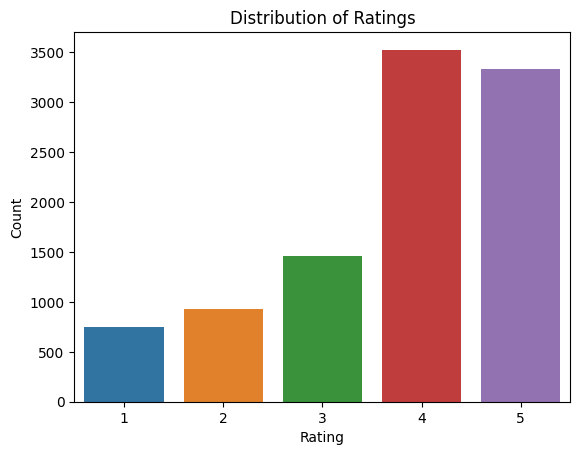

In [28]:
# Distribution of Ratings
sns.countplot(x='stars', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

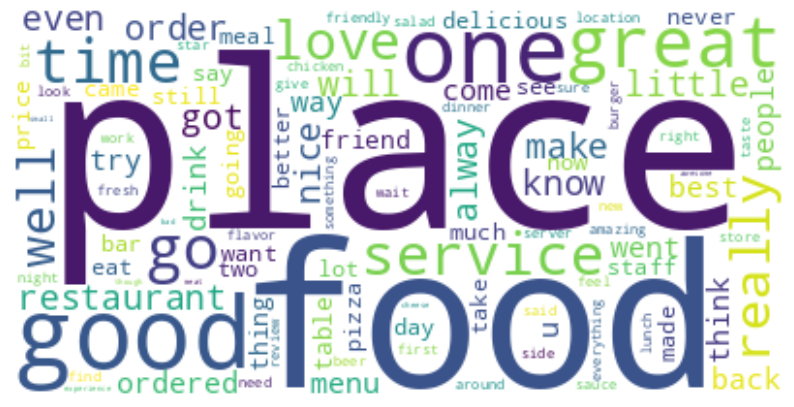

In [29]:
# Generate a word cloud for the reviews
text = " ".join(review for review in data['text'])
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

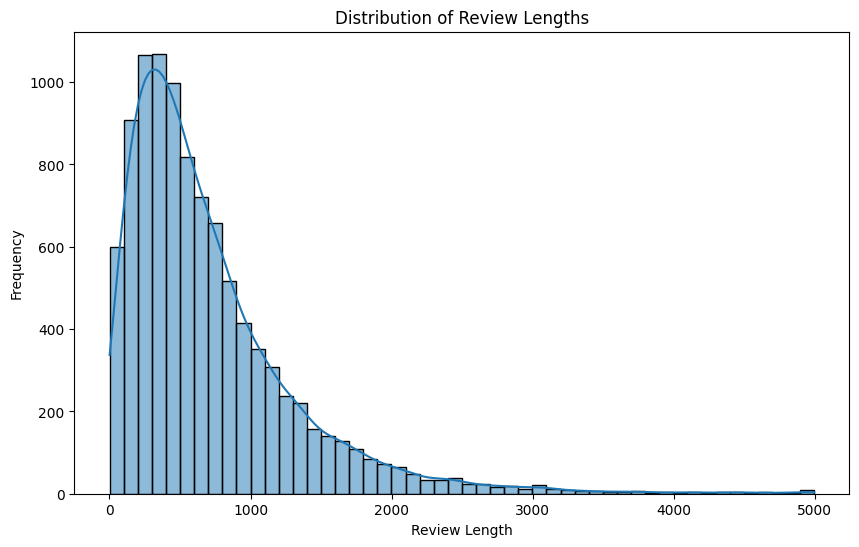

In [30]:
# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

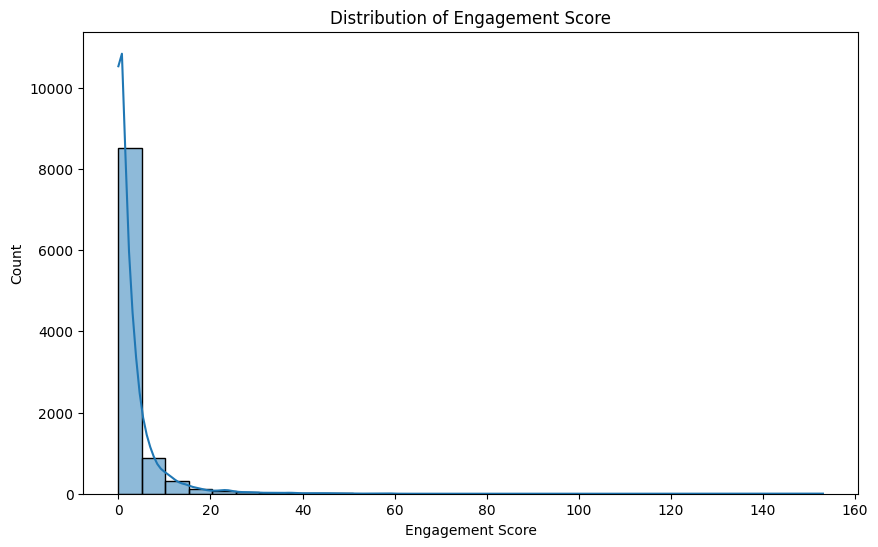

In [31]:
# Create an Engagement Score by summing "cool", "useful", and "funny"
data['engagement_score'] = data['cool'] + data['useful'] + data['funny']

# Visualize the distribution of the Engagement Score
plt.figure(figsize=(10, 6))
sns.histplot(data['engagement_score'], bins=30, kde=True)
plt.title('Distribution of Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Count')
plt.show()

## 6.2 BIVARIATE

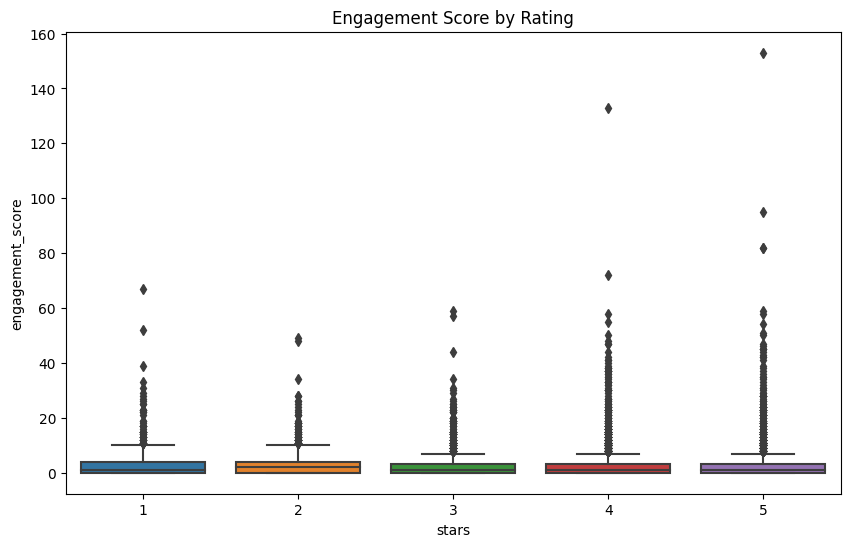

In [32]:

# Investigate relationship between Engagement Score and Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='engagement_score', data=data)
plt.title('Engagement Score by Rating')
plt.show()

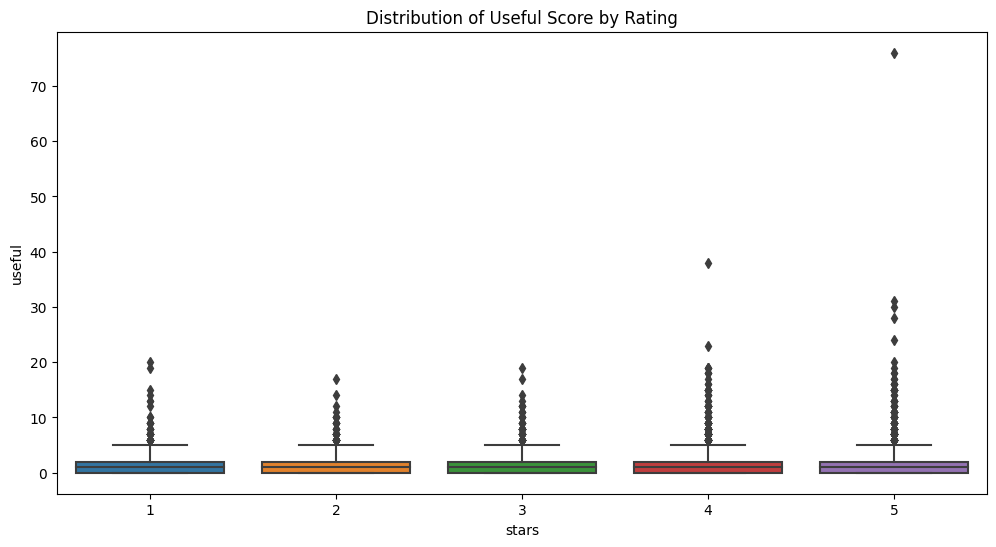

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='stars', y='useful', data=data)
plt.title('Distribution of Useful Score by Rating')
plt.show()

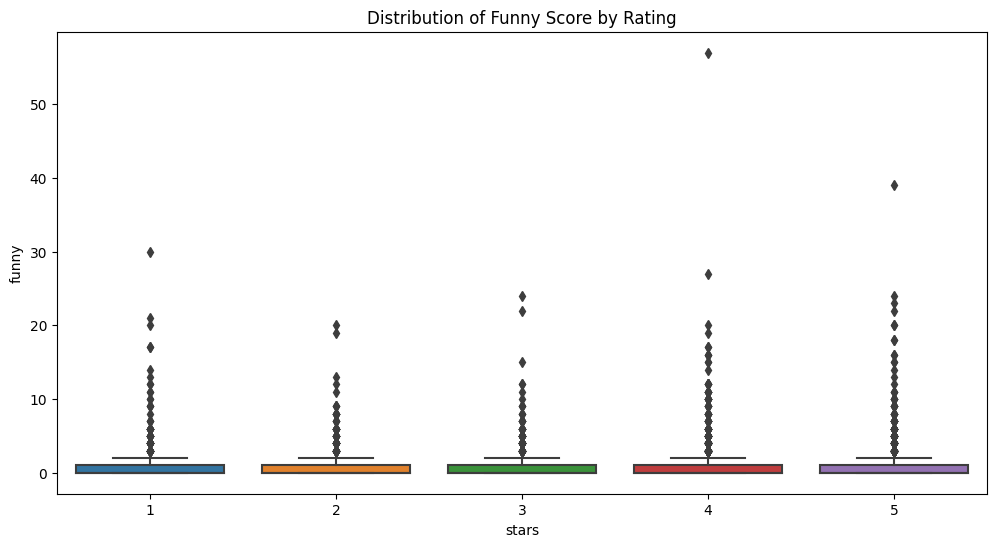

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='stars', y='funny', data=data)
plt.title('Distribution of Funny Score by Rating')
plt.show()

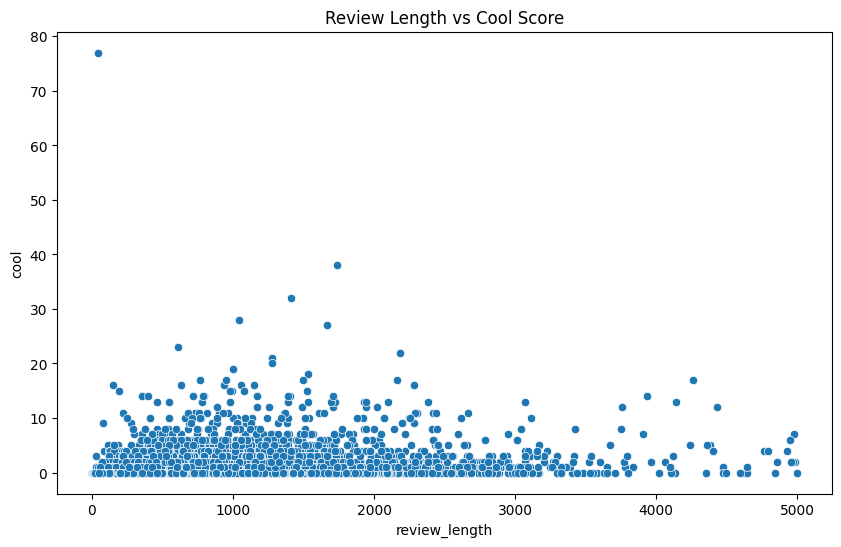

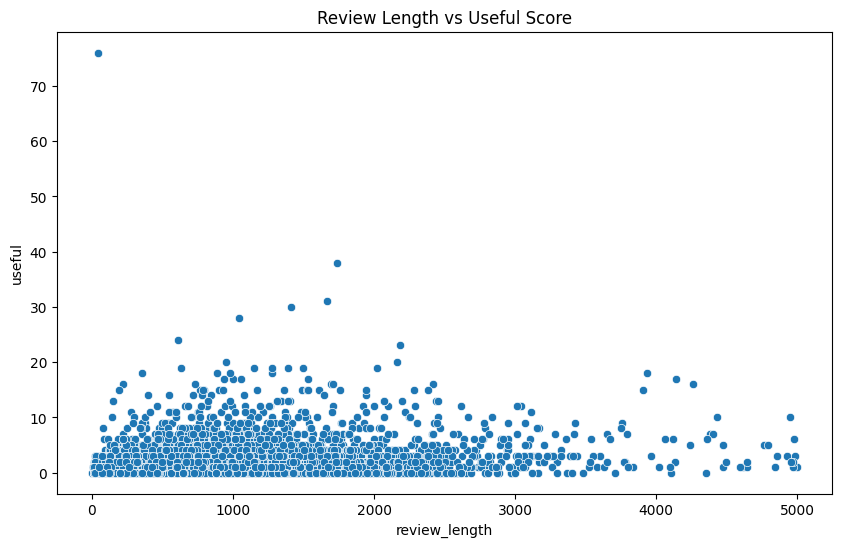

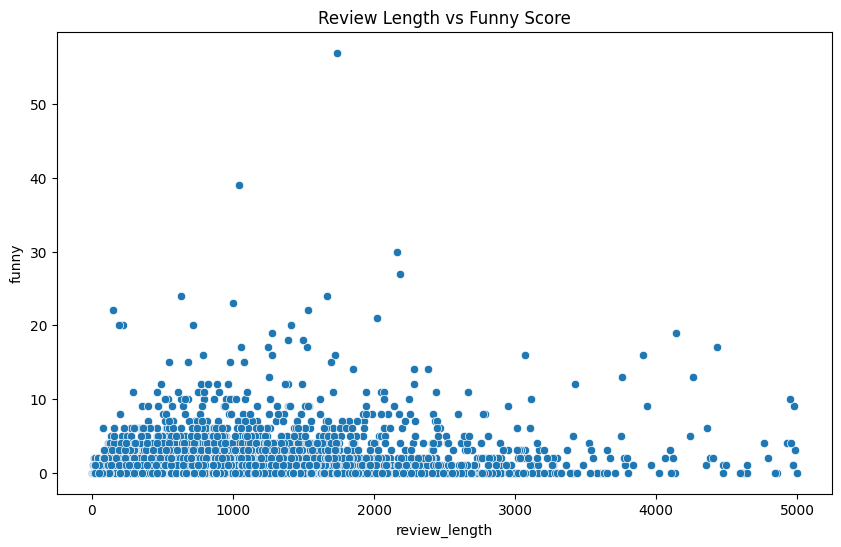

In [35]:
#Review Length vs. "cool", "useful", and "funny" scores
# Add a column for review length
data['review_length'] = data['text'].apply(len)

# Plot relationships between review length and "cool", "useful", "funny"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='cool', data=data)
plt.title('Review Length vs Cool Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='useful', data=data)
plt.title('Review Length vs Useful Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='funny', data=data)
plt.title('Review Length vs Funny Score')
plt.show()


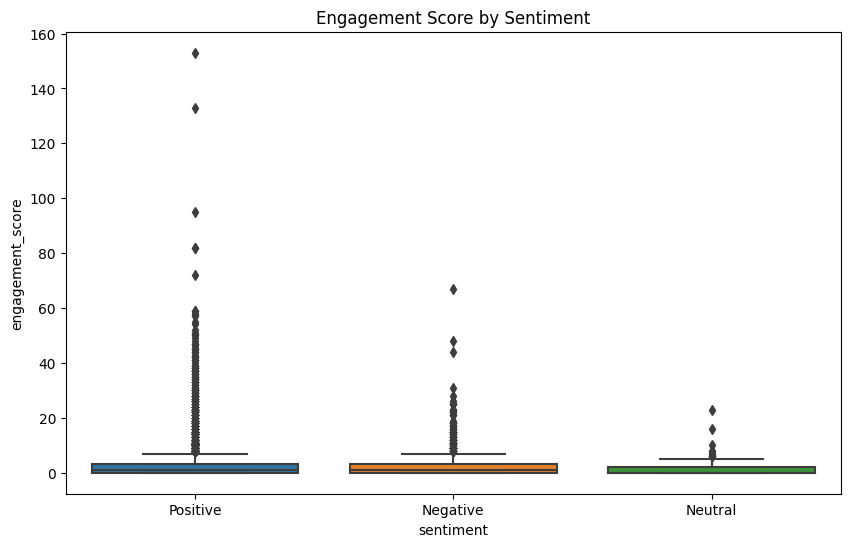

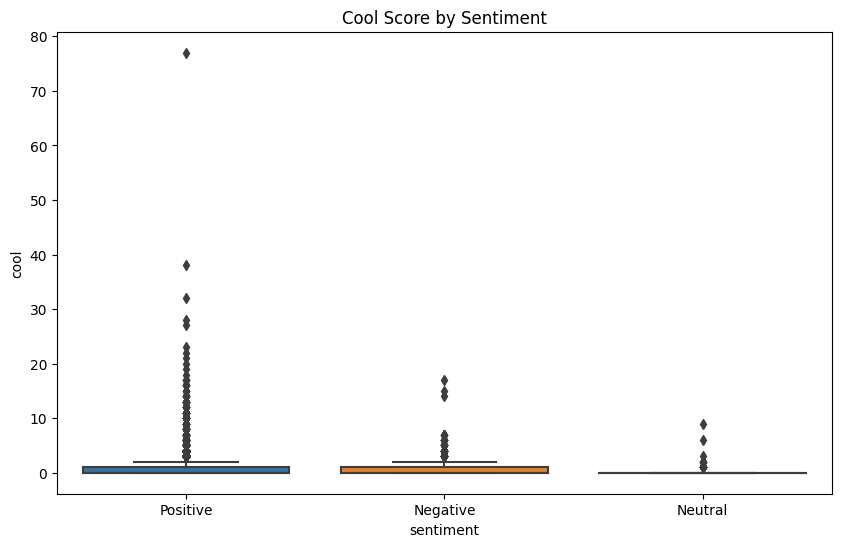

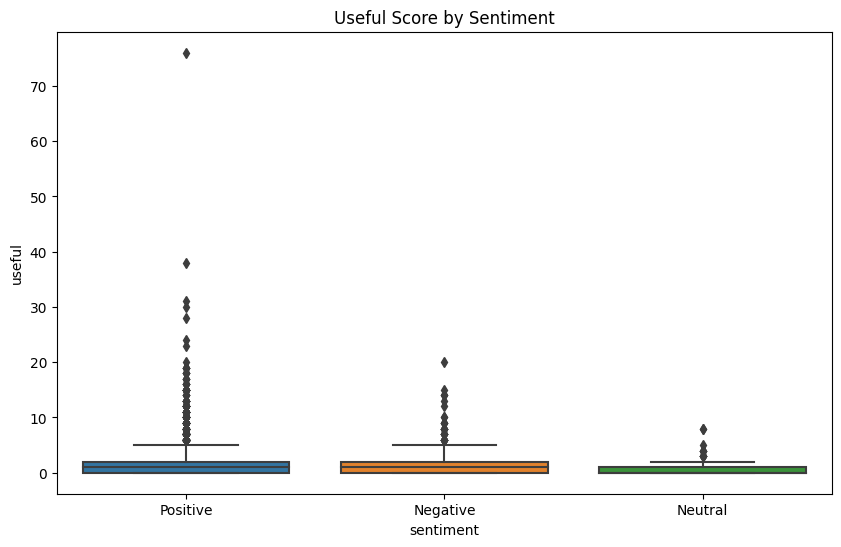

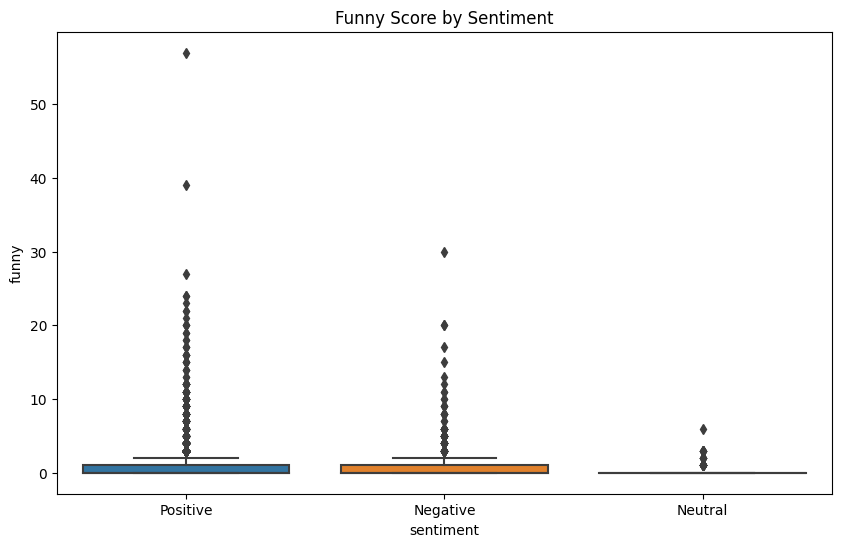

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='engagement_score', data=data)
plt.title('Engagement Score by Sentiment')
plt.show()

# Investigate specific engagement categories (cool, useful, funny) by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='cool', data=data)
plt.title('Cool Score by Sentiment')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='useful', data=data)
plt.title('Useful Score by Sentiment')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='funny', data=data)
plt.title('Funny Score by Sentiment')
plt.show()

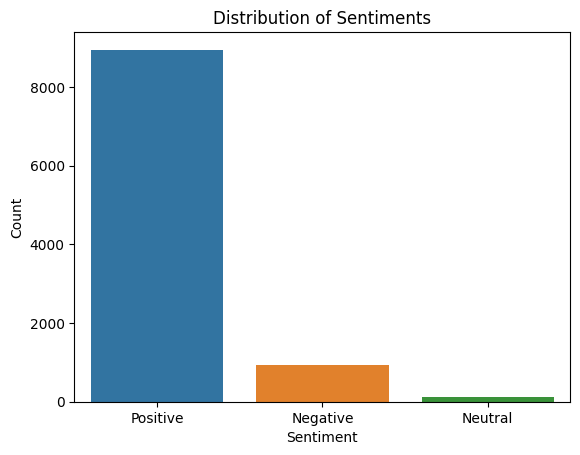

In [37]:
# Distribution of Sentiments (if sentiment analysis has been performed)
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

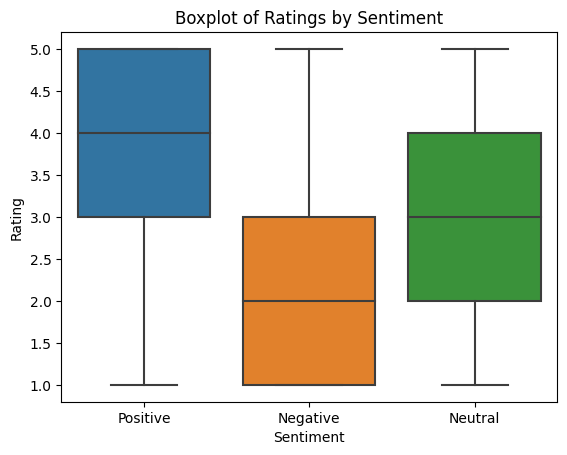

In [38]:
# Boxplot of Ratings by Sentiment
sns.boxplot(x='sentiment', y='stars', data=data)
plt.title('Boxplot of Ratings by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

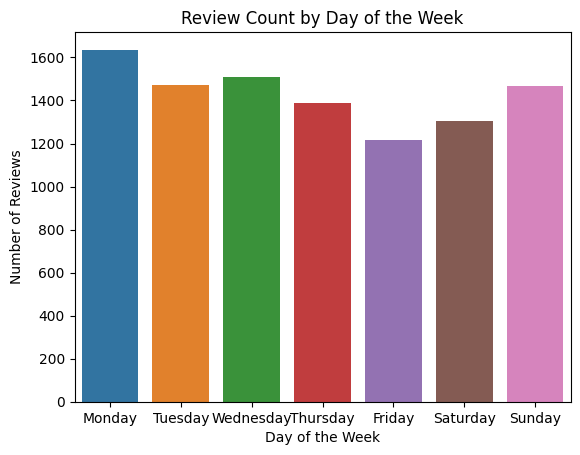

In [39]:
# Review Count by Day of the Week
sns.countplot(x='day_of_week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Review Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Reviews')
plt.show()

## 6.3 MULTIVARIATE

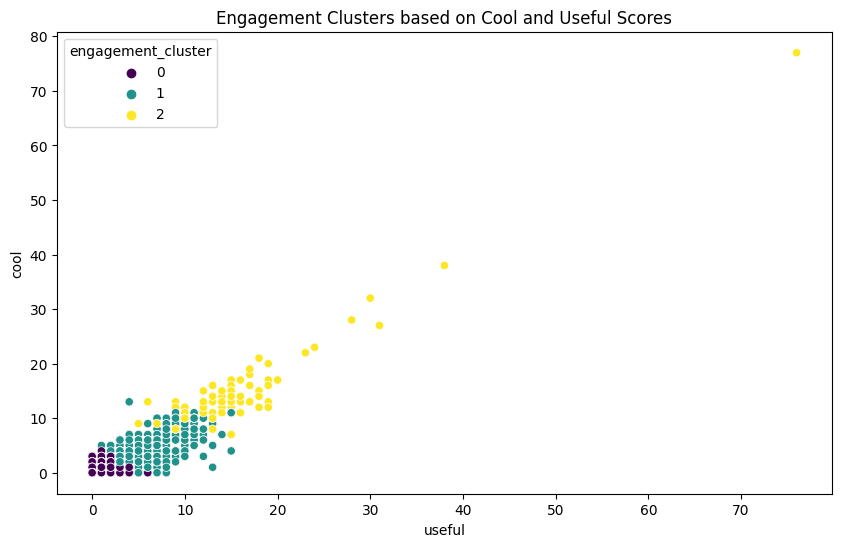

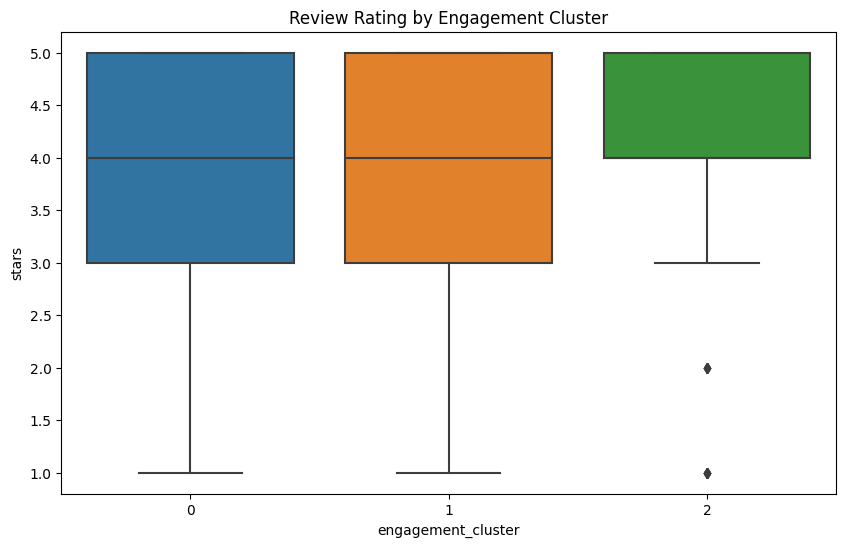

In [40]:
# Prepare the data for clustering (standardize the data)
features = data[['cool', 'useful', 'funny']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['engagement_cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='useful', y='cool', hue='engagement_cluster', data=data, palette='viridis')
plt.title('Engagement Clusters based on Cool and Useful Scores')
plt.show()

# Investigate how engagement clusters relate to review ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='engagement_cluster', y='stars', data=data)
plt.title('Review Rating by Engagement Cluster')
plt.show()

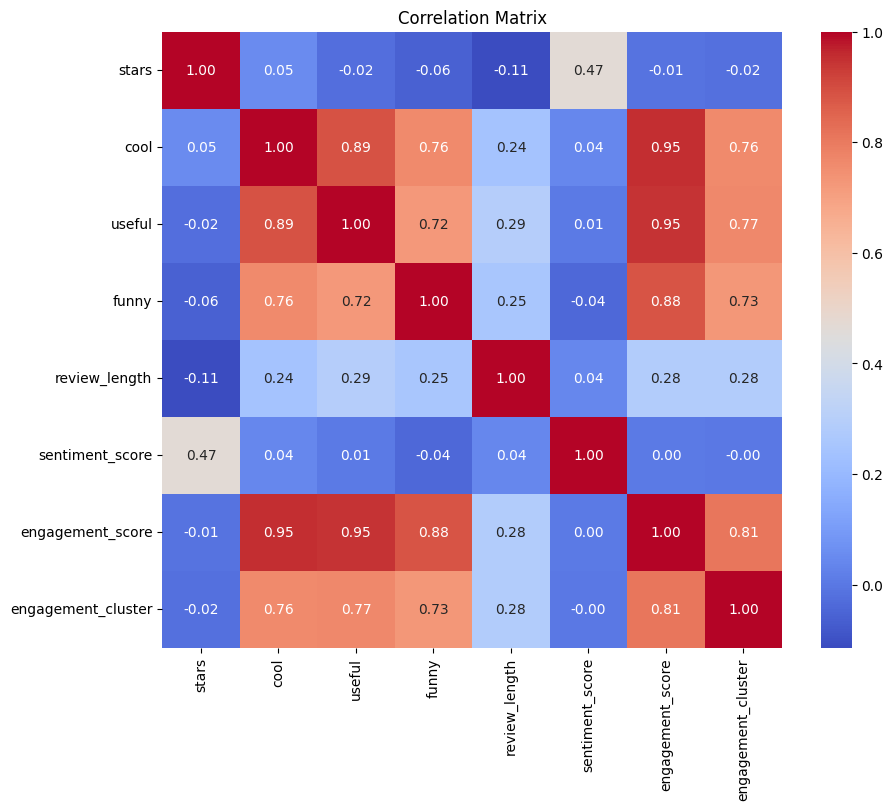

In [41]:
# Select only numeric columns for correlation analysis
data_numeric = data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = data_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

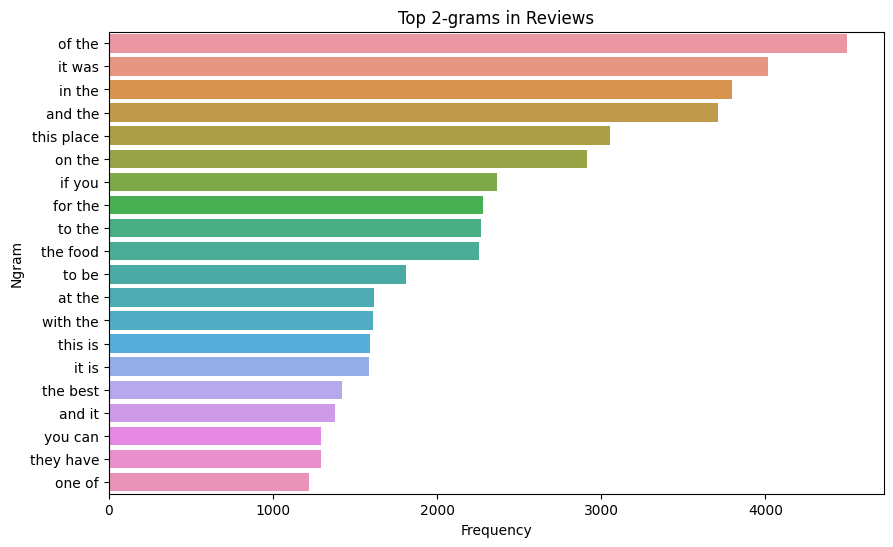

In [42]:
# Top N-Grams (Bigrams or Trigrams)
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(corpus, n=2, n_top=20):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_n_words = words_freq[:n_top]
    words_df = pd.DataFrame(top_n_words, columns=['Ngram', 'Frequency'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Ngram', data=words_df)
    plt.title(f'Top {n}-grams in Reviews')
    plt.show()

# Plot top bigrams
plot_top_ngrams(data['text'], n=2, n_top=20)
plt.show()

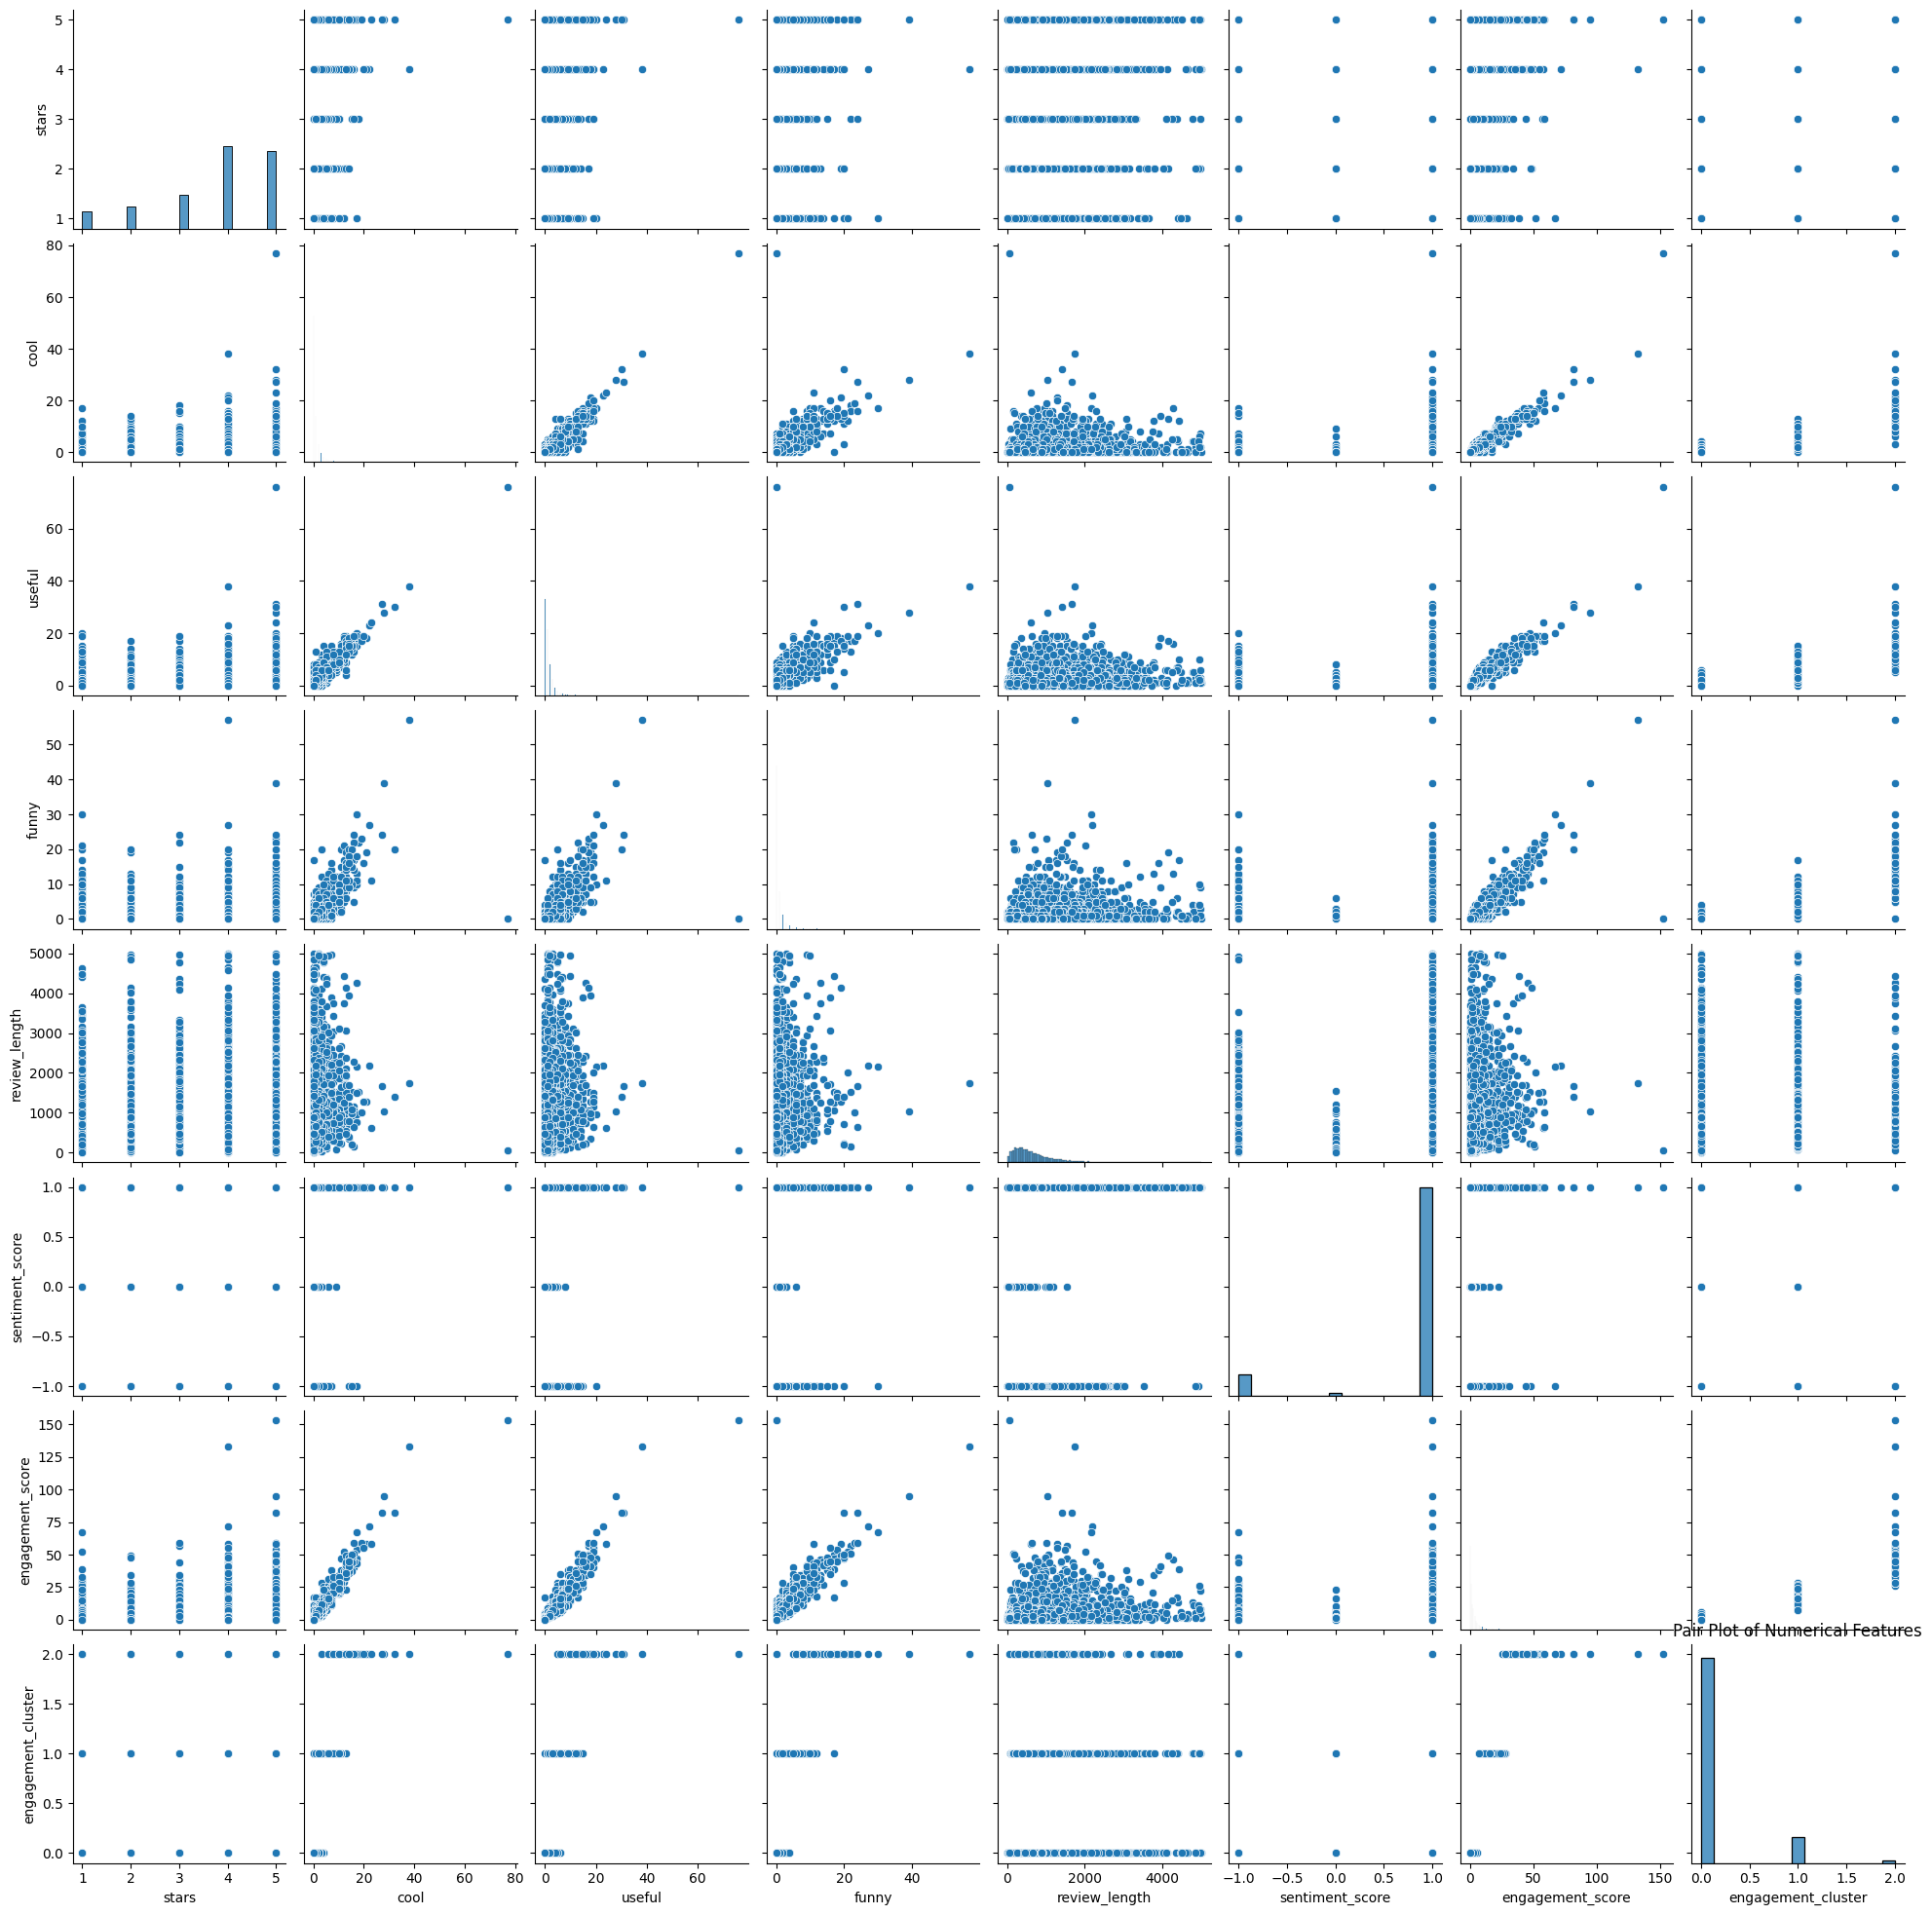

In [43]:
# Pair Plot of Numerical Features
sns.pairplot(data)
plt.title('Pair Plot of Numerical Features')
plt.show()

# 7. Advanced Sentiment Analysis with VADER

In [44]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_nuanced_sentiment(review):
    sentiment = analyzer.polarity_scores(review)
    compound_score = sentiment['compound']
    
    # Determine the emotion based on compound score
    if compound_score >= 0.05:
        emotion = "joy"
    elif compound_score <= -0.05:
        emotion = "anger"
    else:
        emotion = "neutral"
        
    
    
    return f"{emotion}"

# Apply the sentiment function
data['nuanced_sentiment'] = data['text'].apply(get_nuanced_sentiment)


data.head()

,date,stars,text,type,cool,useful,funny,review_length,day_of_week,sentiment,sentiment_score,cool_category,useful_category,funny_category,engagement_score,engagement_cluster,nuanced_sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0,889,Wednesday,Positive,1,Low Engagement,Medium Engagement,No Engagement,7,1,joy
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0,1345,Wednesday,Positive,1,No Engagement,No Engagement,No Engagement,0,0,joy
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0,1,0,76,Thursday,Positive,1,No Engagement,Low Engagement,No Engagement,1,0,joy
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0,419,Thursday,Positive,1,Low Engagement,Low Engagement,No Engagement,3,0,joy
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,469,Thursday,Positive,1,No Engagement,No Engagement,No Engagement,0,0,joy


# 8.Aspect-Based Review Segmentation with spaCy

In [45]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Define the list of relevant aspects in order of priority
relevant_aspects = ['service', 'food', 'price', 'ambiance', 'location']

def aspect_based_segmentation(review):
    doc = nlp(review.lower())  # Convert to lowercase for consistency
    
    # Check for the first occurrence of any aspect
    for aspect in relevant_aspects:
        if aspect in doc.text:
            return aspect.capitalize()  # Return the first matching aspect with proper casing
    
    return 'General'


# Apply the segmentation function
data['review_segments'] = data['text'].apply(aspect_based_segmentation)

data.head()

,date,stars,text,type,cool,useful,funny,review_length,day_of_week,sentiment,sentiment_score,cool_category,useful_category,funny_category,engagement_score,engagement_cluster,nuanced_sentiment,review_segments
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0,889,Wednesday,Positive,1,Low Engagement,Medium Engagement,No Engagement,7,1,joy,Food
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0,1345,Wednesday,Positive,1,No Engagement,No Engagement,No Engagement,0,0,joy,Price
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0,1,0,76,Thursday,Positive,1,No Engagement,Low Engagement,No Engagement,1,0,joy,General
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0,419,Thursday,Positive,1,Low Engagement,Low Engagement,No Engagement,3,0,joy,General
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,469,Thursday,Positive,1,No Engagement,No Engagement,No Engagement,0,0,joy,General


# 9. Extract Actionable Insights with TextBlob

In [46]:
def extract_actionable_insights(review):
    blob = TextBlob(review)
    insights = []
    if 'improve' in review.lower():
        insights.append('Improvement Suggestion')
    if 'complaint' in review.lower():
        insights.append('Complaint')
    
    return ', '.join(insights) if insights else 'No Actionable Insights'


# Apply the insights extraction function
data['actionable_insights'] = data['text'].apply(extract_actionable_insights)

data.head()

,date,stars,text,type,cool,useful,funny,review_length,day_of_week,sentiment,sentiment_score,cool_category,useful_category,funny_category,engagement_score,engagement_cluster,nuanced_sentiment,review_segments,actionable_insights
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0,889,Wednesday,Positive,1,Low Engagement,Medium Engagement,No Engagement,7,1,joy,Food,No Actionable Insights
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0,1345,Wednesday,Positive,1,No Engagement,No Engagement,No Engagement,0,0,joy,Price,No Actionable Insights
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0,1,0,76,Thursday,Positive,1,No Engagement,Low Engagement,No Engagement,1,0,joy,General,No Actionable Insights
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0,419,Thursday,Positive,1,Low Engagement,Low Engagement,No Engagement,3,0,joy,General,No Actionable Insights
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,469,Thursday,Positive,1,No Engagement,No Engagement,No Engagement,0,0,joy,General,No Actionable Insights


# 10. Review Classification for Targeted Marketing with scikit-learn

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Example training data
train_data = pd.DataFrame({
    'review': ['Great product upgrade needed', 'Bad service, might churn', 'Perfect delivery', 'Love the service'],
    'label': ['upgrade', 'churn', 'delivery', 'service']
})

# Train a classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(train_data['review'], train_data['label'])

def classify_review_for_marketing(review):
    return model.predict([review])[0]


# Apply the classification function
data['marketing_classification'] = data['text'].apply(classify_review_for_marketing)


data.head()

,date,stars,text,type,cool,useful,funny,review_length,day_of_week,sentiment,sentiment_score,cool_category,useful_category,funny_category,engagement_score,engagement_cluster,nuanced_sentiment,review_segments,actionable_insights,marketing_classification
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0,889,Wednesday,Positive,1,Low Engagement,Medium Engagement,No Engagement,7,1,joy,Food,No Actionable Insights,service
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0,1345,Wednesday,Positive,1,No Engagement,No Engagement,No Engagement,0,0,joy,Price,No Actionable Insights,service
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0,1,0,76,Thursday,Positive,1,No Engagement,Low Engagement,No Engagement,1,0,joy,General,No Actionable Insights,service
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0,419,Thursday,Positive,1,Low Engagement,Low Engagement,No Engagement,3,0,joy,General,No Actionable Insights,service
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,469,Thursday,Positive,1,No Engagement,No Engagement,No Engagement,0,0,joy,General,No Actionable Insights,service


# 11. Fake Review Detection with Explainability

In [48]:
import re

def detect_fake_review_with_explanation(review):
    # Heuristic 1: Check for excessive exclamation marks
    exclamation_count = review.count('!')
    if exclamation_count > 3:
        explanation = "This review contains an unusually high number of exclamation points, which might indicate it's fake."
        return explanation
    
    # Heuristic 2: Check for repetitive phrases
    words = review.split()
    unique_words = set(words)
    if len(words) > 50 and len(unique_words) < len(words) / 2:
        explanation = "This review has a lot of repetitive words or phrases, which might indicate it's fake."
        return explanation
    
    # Heuristic 3: Check for overly positive or negative words
    positive_words = len(re.findall(r'\b(excellent|amazing|perfect|best)\b', review, re.IGNORECASE))
    negative_words = len(re.findall(r'\b(terrible|worst|horrible|awful)\b', review, re.IGNORECASE))
    if positive_words > 5 or negative_words > 5:
        explanation = "This review uses an excessive number of overly positive or negative words, which might indicate it's fake."
        return explanation
    
    # If none of the heuristics apply, assume it's genuine
    explanation = "This review does not contain any obvious signs of being fake based on simple heuristics."
    return explanation

# Apply the fake review detection with explanation function to the reviews
data['fake_review_with_explanation'] = data['text'].apply(detect_fake_review_with_explanation)

# Display the results with explanations
print(data[['text', 'fake_review_with_explanation']].head())

                                                text  \
0  My wife took me here on my birthday for breakf...   
1  I have no idea why some people give bad review...   
2  love the gyro plate. Rice is so good and I als...   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...   
4  General Manager Scott Petello is a good egg!!!...   

                        fake_review_with_explanation  
0  This review uses an excessive number of overly...  
1  This review does not contain any obvious signs...  
2  This review does not contain any obvious signs...  
3  This review contains an unusually high number ...  
4  This review contains an unusually high number ...  


In [49]:
# Define the mapping function to convert explanations to labels
def label_fake_review(explanation):
    if "excessive number of overly positive or negative words" in explanation:
        return "fake"
    elif "unusually high number of exclamation points" in explanation:
        return "fake"
    elif "a lot of repetitive words or phrases" in explanation:
        return "fake"
    else:
        return "not fake"

# Apply the function to create a new column with labels
data['fake_or_not'] = data['fake_review_with_explanation'].apply(label_fake_review)

# Display the DataFrame with the new column to verify
data.head()

,date,stars,text,type,cool,useful,funny,review_length,day_of_week,sentiment,...,useful_category,funny_category,engagement_score,engagement_cluster,nuanced_sentiment,review_segments,actionable_insights,marketing_classification,fake_review_with_explanation,fake_or_not
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,2,5,0,889,Wednesday,Positive,...,Medium Engagement,No Engagement,7,1,joy,Food,No Actionable Insights,service,This review uses an excessive number of overly...,fake
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,0,0,1345,Wednesday,Positive,...,No Engagement,No Engagement,0,0,joy,Price,No Actionable Insights,service,This review does not contain any obvious signs...,not fake
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0,1,0,76,Thursday,Positive,...,Low Engagement,No Engagement,1,0,joy,General,No Actionable Insights,service,This review does not contain any obvious signs...,not fake
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,1,2,0,419,Thursday,Positive,...,Low Engagement,No Engagement,3,0,joy,General,No Actionable Insights,service,This review contains an unusually high number ...,fake
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,469,Thursday,Positive,...,No Engagement,No Engagement,0,0,joy,General,No Actionable Insights,service,This review contains an unusually high number ...,fake


# 12. Hypothesis Testing

## Hypothesis 1: Average Rating

In [50]:
avg_rating = data['stars']
t_stat, p_val = stats.ttest_1samp(avg_rating, 3.5)
print(f"\nHypothesis 1: p-value = {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: The average rating is significantly different from 3.5.")
else:
    print("Fail to reject the null hypothesis: The average rating is not significantly different from 3.5.")


Hypothesis 1: p-value = 1.0909499466603286e-112
Reject the null hypothesis: The average rating is significantly different from 3.5.


## Hypothesis 2: Review Length

In [51]:
long_reviews = data[data['review_length'] > data['review_length'].median()]['stars']
short_reviews = data[data['review_length'] <= data['review_length'].median()]['stars']
t_stat, p_val = stats.ttest_ind(long_reviews, short_reviews)
print(f"\nHypothesis 2: p-value = {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in ratings between longer and shorter reviews.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ratings between longer and shorter reviews.")


Hypothesis 2: p-value = 7.190560567680418e-18
Reject the null hypothesis: There is a significant difference in ratings between longer and shorter reviews.


## Hypothesis 3: Sentiment Impact on Rating

In [52]:
positive_sentiment = data[data['sentiment'] == 'Positive']['stars']
negative_sentiment = data[data['sentiment'] == 'Negative']['stars']
neutral_sentiment = data[data['sentiment'] == 'Neutral']['stars']
t_stat, p_val = stats.ttest_ind(positive_sentiment, negative_sentiment)
print(f"\nHypothesis 3: p-value = {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in ratings between positive, negative and neutral sentiment reviews.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ratings between positive, negative and neutral sentiment reviews.")


Hypothesis 3: p-value = 0.0
Reject the null hypothesis: There is a significant difference in ratings between positive, negative and neutral sentiment reviews.


## Hypothesis 4: Rating by Day of the Week

In [53]:
weekday_ratings = data[data['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['stars']
weekend_ratings = data[data['day_of_week'].isin(['Saturday', 'Sunday'])]['stars']
t_stat, p_val = stats.ttest_ind(weekday_ratings, weekend_ratings)
print(f"\nHypothesis 4: p-value = {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in ratings between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ratings between weekdays and weekends.")


Hypothesis 4: p-value = 0.11110513757760099
Fail to reject the null hypothesis: There is no significant difference in ratings between weekdays and weekends.


## Hypothesis 5: Fake Reviews and Sentiment Extremes

In [54]:
fake_reviews = data[data['fake_or_not'] == 'fake']['sentiment_score']
real_reviews = data[data['fake_or_not'] == 'not fake']['sentiment_score']
t_stat, p_val = stats.ttest_ind(fake_reviews, real_reviews)
print(f"\nHypothesis 5: p-value = {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in sentiment scores between fake and real reviews.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sentiment scores between fake and real reviews.")


Hypothesis 5: p-value = 5.72288458203645e-06
Reject the null hypothesis: There is a significant difference in sentiment scores between fake and real reviews.


# 13. Data Preprocessing For Mechine Learning Model.

## 1. Data Preprocessing

In [55]:
# Converting categorical columns into numeric using Label Encoding
label_columns = ['type','sentiment', 'day_of_week', 'nuanced_sentiment','actionable_insights', 'fake_or_not','cool_category','useful_category','funny_category','marketing_classification']
for col in label_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [56]:
# Drop unnecessary columns like text data ('text', 'review_segments') if not used for prediction
data = data.drop(columns=['date','text', 'review_segments', 'fake_review_with_explanation'])

In [57]:
# Separate features and target
X = data.drop(columns=['stars'])  # Features
y = data['stars']  # Target (Customer Ratings)

In [58]:
# Scaling numerical features (cool, useful, funny, etc.)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## 2. Handling Class Imbalance

In [59]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

## 3. Train-Test Split

In [60]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## 4. Feature Selection Using RFE

In [61]:
# Perform RFE to select the top 10 features
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [62]:
# Get the top 10 selected features
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE: ", selected_features)

Selected Features by RFE:  Index(['cool', 'useful', 'funny', 'review_length', 'sentiment',
       'sentiment_score', 'cool_category', 'funny_category',
       'engagement_score', 'fake_or_not'],
      dtype='object')


In [63]:
# Filter the train and test set with the top 10 features
X_train_rfe = X_train[:, rfe.support_]
X_test_rfe = X_test[:, rfe.support_]

## 5. VIF Calculation and Elimination

In [64]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant for VIF calculation
X_train_rfe_with_constant = sm.add_constant(X_train_rfe)

In [65]:
# Function to calculate VIF for each variable
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate initial VIF values
vif_data = calculate_vif(pd.DataFrame(X_train_rfe_with_constant, columns=['const'] + list(selected_features)))
print(vif_data)

             Feature           VIF
0              const  1.085312e+00
1               cool           inf
2             useful           inf
3              funny           inf
4      review_length  1.182372e+00
5          sentiment  2.673734e+06
6    sentiment_score  2.673734e+06
7      cool_category  1.909868e+00
8     funny_category  1.969349e+00
9   engagement_score           inf
10       fake_or_not  1.047624e+00


In [66]:
# Ensure that the feature to be removed exists before dropping it
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initial VIF Calculation
X_train_rfe_df = pd.DataFrame(X_train_rfe_with_constant, columns=['const'] + list(selected_features))  # Ensure consistent column names

# Check initial VIF values
vif_data = calculate_vif(X_train_rfe_df)
print(vif_data)

# Eliminate variables based on VIF (until all VIF < 5)
while vif_data['VIF'].max() > 5:
    # Get the feature with the highest VIF
    feature_to_remove = vif_data.sort_values('VIF', ascending=False)['Feature'].iloc[0]
    
    # Ensure the feature exists in the DataFrame before dropping it
    if feature_to_remove in X_train_rfe_df.columns:
        print(f"Dropping feature: {feature_to_remove} due to high VIF")
        X_train_rfe_df = X_train_rfe_df.drop(columns=[feature_to_remove])
        selected_features = selected_features[selected_features != feature_to_remove]
    
    # Recalculate VIF
    vif_data = calculate_vif(X_train_rfe_df)
    print(vif_data)

# Rebuild the model after eliminating features with high VIF
X_train_vif = X_train_rfe_df.drop(columns=['const']).values  # Drop the constant term for training
lr_final = sm.OLS(y_train, sm.add_constant(X_train_vif)).fit()
print(lr_final.summary())

             Feature           VIF
0              const  1.085312e+00
1               cool           inf
2             useful           inf
3              funny           inf
4      review_length  1.182372e+00
5          sentiment  2.673734e+06
6    sentiment_score  2.673734e+06
7      cool_category  1.909868e+00
8     funny_category  1.969349e+00
9   engagement_score           inf
10       fake_or_not  1.047624e+00
Dropping feature: cool due to high VIF
            Feature        VIF
0             const   1.085312
1            useful  20.479508
2             funny  13.809745
3     review_length   1.182364
4         sentiment        inf
5   sentiment_score        inf
6     cool_category   1.909939
7    funny_category   1.969444
8  engagement_score  52.302259
9       fake_or_not   1.048443
Dropping feature: sentiment due to high VIF
            Feature        VIF
0             const   1.085312
1            useful  20.479508
2             funny  13.809745
3     review_length   1.182368
4

# 14. Linear Regression Model

In [67]:
# Train the final linear regression model with reduced features
lr_model = LinearRegression()
lr_model.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_rfe)

##  Evaluate Linear Regression Model

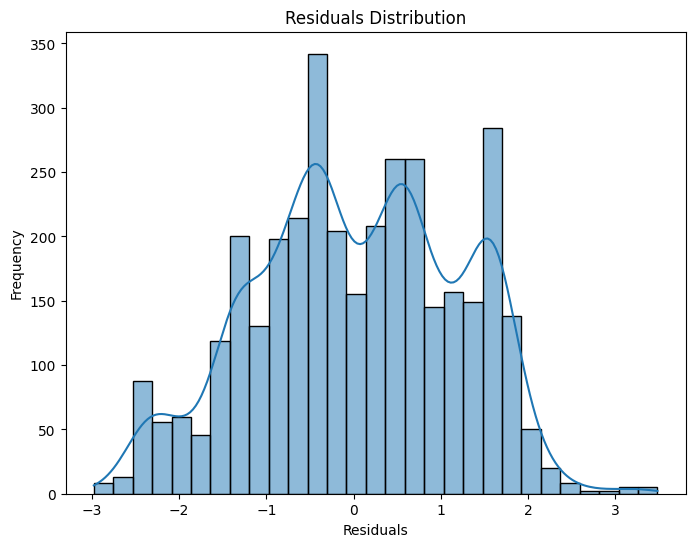

Mean Squared Error: 1.373444999218421
R-squared: 0.3153653518210352


In [68]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the residuals
residuals = y_test - y_pred_lr

# Residual Analysis
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Model performance metrics
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 15. Logistic Regression Model

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_rfe, y_train)

# Predict
y_pred_log = log_reg.predict(X_test_rfe)
y_pred_log_proba = log_reg.predict_proba(X_test_rfe)[:, 1]

## Evaluate Logistic Regression Model

In [70]:
#Train Logistic Regression on the selected features
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_rfe, y_train)

# Step 3: Predict using the same features
y_pred_log = log_reg.predict(X_test_rfe)
y_pred_log_proba = log_reg.predict_proba(X_test_rfe)[:, 1]  # Get predicted probabilities for ROC-AUC

# Step 4: Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log, average='weighted')
recall = recall_score(y_test, y_pred_log, average='weighted')
f1 = f1_score(y_test, y_pred_log, average='weighted')

print(f"Logistic Regression - Accuracy: {accuracy1}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Logistic Regression - Accuracy: 0.36216676120249575, Precision: 0.35216129973375304, Recall: 0.36216676120249575, F1 Score: 0.3484306147310171


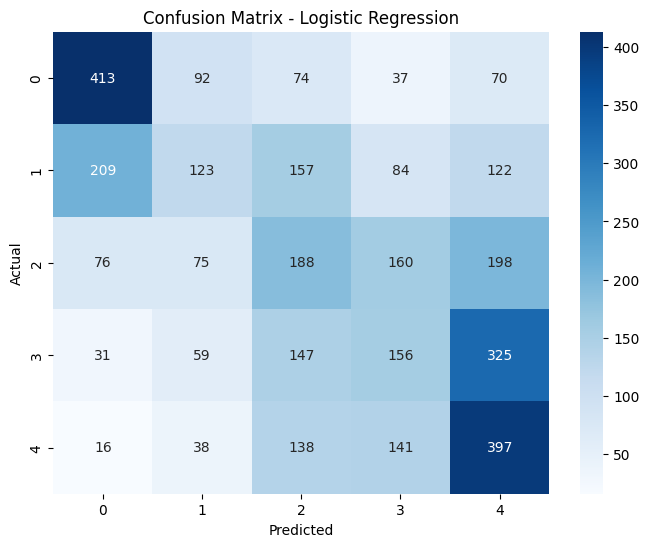

In [71]:
# Confusion Matrix for Logistic Regression
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 16. Support Vector Machine (SVM)

In [72]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train_rfe, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_rfe)
y_pred_svm_proba = svm_model.predict_proba(X_test_rfe)[:, 1]

## Evaluate SVM Model

In [73]:

# Evaluate SVM Model
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

SVM - Accuracy: 0.37521270561542824, Precision: 0.3707961356796392, Recall: 0.37521270561542824, F1 Score: 0.3639415887213206


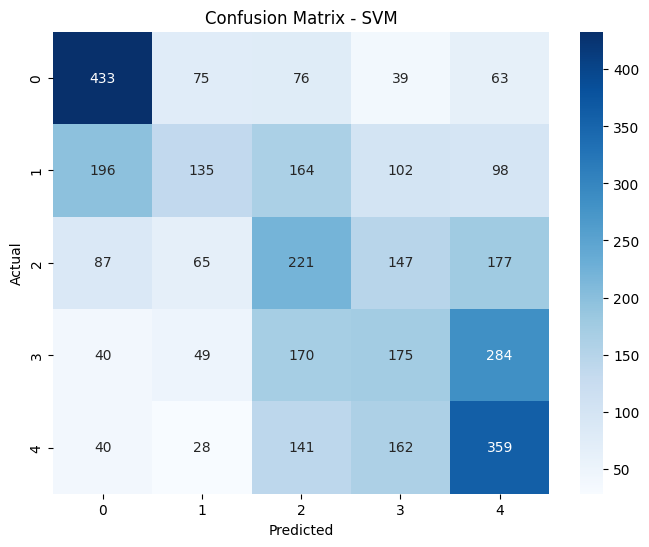

In [74]:
# Confusion Matrix for SVM
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 17. Random Forest with Hyperparameter Tuning

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV for hyperparameter tuning
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_rf.fit(X_train_rfe, y_train)

# Best parameters and the best estimator after tuning
print("Best Parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


## Random Forest Evaluation

Random Forest - Accuracy: 0.44214407260351674, Precision: 0.4406091929462515, Recall: 0.44214407260351674, F1 Score: 0.4398530942807983


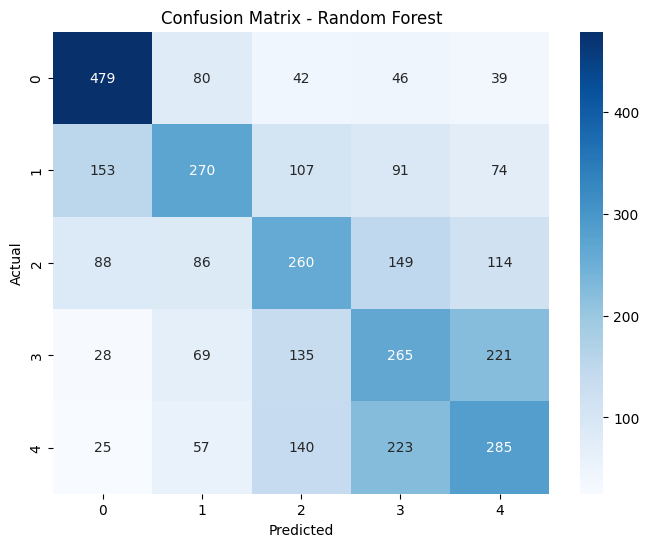

In [78]:
# Predict on the test set using the best Random Forest model
y_pred_rf = best_rf.predict(X_test_rfe)
y_pred_rf_proba = best_rf.predict_proba(X_test_rfe)[:, 1]  # Probability for ROC-AUC

# Evaluate Random Forest Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")

# Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 18. Summary Table of Results for All Models

In [79]:
# Prepare a summary of all model results
summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [
        r2, 
        accuracy_score(y_test, y_pred_log), 
        accuracy_score(y_test, y_pred_svm), 
        accuracy_rf
    ],
    'Precision': [
        None,  # Linear Regression doesn't have precision for classification
        precision_score(y_test, y_pred_log, average='weighted'),
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_rf
    ],
    'Recall': [
        None,  # Linear Regression doesn't have recall for classification
        recall_score(y_test, y_pred_log, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_rf
    ],
    'F1 Score': [
        None,  # Linear Regression doesn't have F1 score for classification
        f1_score(y_test, y_pred_log, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_rf
    ],
   
})

print(summary)

                 Model  Accuracy  Precision    Recall  F1 Score
0    Linear Regression  0.315365        NaN       NaN       NaN
1  Logistic Regression  0.362167   0.352161  0.362167  0.348431
2                  SVM  0.375213   0.370796  0.375213  0.363942
3        Random Forest  0.442144   0.440609  0.442144  0.439853


**By comparing these models, we can clearly see that Random Forest has the edge but still requires further tuning or enhancement to produce more accurate predictions.**

# 19. Further Tune Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define an extended parameter grid for Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 150, 200],           
    'max_depth': [10, 15, 20, 25],            
    'min_samples_split': [2, 5],             
    'min_samples_leaf': [1, 2, 3],           
    'bootstrap': [True, False]               
}


# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_rf.fit(X_train_rfe, y_train)

# Get the best parameters
print("Best Parameters for Random Forest: ", grid_rf.best_params_)

# Evaluate the tuned Random Forest
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_rfe)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy after tuning Random Forest: {accuracy_rf}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   4.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, mi

# 20. Feature Engineering

## Deriving New Features

In [81]:
# Add a new feature called 'engagement_score' (if not already included)
data['engagement_score'] = data['cool'] + data['useful'] + data['funny']

# Re-train models with new features
X = data.drop(columns=['stars'])  # Features
y = data['stars']  # Target
X_scaled = scaler.fit_transform(X)

# Split the data again for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Recursive Feature Elimination (RFE)

In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Perform RFE with Logistic Regression to select the top 7 features
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=7)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features: ", selected_features)

# Re-train using only the selected features
X_train_rfe = X_train[:, rfe.support_]
X_test_rfe = X_test[:, rfe.support_]

Selected Features:  Index(['cool', 'useful', 'funny', 'review_length', 'sentiment',
       'sentiment_score', 'fake_or_not'],
      dtype='object')


In [83]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Add a constant column to the features for VIF calculation
X_train_vif = pd.DataFrame(X_train, columns=X.columns)
X_train_vif['Intercept'] = 1

# Function to calculate VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calculate initial VIF values
vif_data = calculate_vif(X_train_vif)

# Iteratively remove features with VIF > 5
while vif_data['VIF'].max() > 5:
    feature_to_remove = vif_data.sort_values('VIF', ascending=False)['Feature'].iloc[0]
    print(f"Removing feature: {feature_to_remove} with VIF = {vif_data['VIF'].max()}")
    
    # Drop the feature from the dataset
    X_train_vif = X_train_vif.drop(columns=[feature_to_remove])
    
    # Recalculate VIF
    vif_data = calculate_vif(X_train_vif)

# Drop the intercept column after eliminating features with high VIF
X_train_vif = X_train_vif.drop(columns=['Intercept'])

# Selected features after VIF filtering
selected_features_vif = X_train_vif.columns
print(f"Selected features after VIF filtering: {selected_features_vif}")

Removing feature: cool with VIF = inf
Removing feature: sentiment with VIF = inf
Removing feature: engagement_score with VIF = 54.00631803531996
Selected features after VIF filtering: Index(['type', 'useful', 'funny', 'review_length', 'day_of_week',
       'sentiment_score', 'cool_category', 'useful_category', 'funny_category',
       'engagement_cluster', 'nuanced_sentiment', 'actionable_insights',
       'marketing_classification', 'fake_or_not'],
      dtype='object')


In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Perform RFE with Logistic Regression to select the top 7 features from the VIF-filtered features
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(X_train_vif, y_train)

# Get the final selected features after RFE
selected_features_rfe = X_train_vif.columns[rfe.support_]
print("Selected Features after RFE: ", selected_features_rfe)

# Convert X_test to a pandas DataFrame
X_test_vif = pd.DataFrame(X_test, columns=X.columns)

# Apply the same transformation to the test set using the selected features
X_test_rfe = X_test_vif[selected_features_rfe]
# Re-train using only the selected features
X_train_rfe = X_train_vif[selected_features_rfe]

Selected Features after RFE:  Index(['useful', 'review_length', 'sentiment_score', 'cool_category',
       'useful_category', 'funny_category', 'engagement_cluster',
       'nuanced_sentiment', 'actionable_insights', 'fake_or_not'],
      dtype='object')


# 21. More Advanced Models

## Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Train the model
gb.fit(X_train_rfe, y_train)

# Evaluate the model
y_pred_gb = gb.predict(X_test_rfe)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

Gradient Boosting Accuracy: 0.393


## XGBoost

In [86]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Adjust the target values to be zero-indexed
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Now train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
xgb_model.fit(X_train_rfe, y_train_adjusted)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test_rfe)

# Adjust predictions back to original scale (add 1)
y_pred_xgb = y_pred_xgb + 1

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.3825


## Neural Networks (MLP Classifier)

In [87]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP (Neural Network)
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train_rfe, y_train)

# Evaluate the model
y_pred_mlp = mlp.predict(X_test_rfe)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Neural Network Accuracy: {accuracy_mlp}")

Neural Network Accuracy: 0.3945


# 22. Fine-tune Class Imbalance Handling

## Class Weighting

In [88]:
# using class weighting in Random Forest
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_balanced.fit(X_train_rfe, y_train)

# Evaluate the model
y_pred_rf_balanced = rf_balanced.predict(X_test_rfe)
accuracy_rf_balanced = accuracy_score(y_test, y_pred_rf_balanced)
print(f"Random Forest with Balanced Class Weight Accuracy: {accuracy_rf_balanced}")

Random Forest with Balanced Class Weight Accuracy: 0.316


## Oversampling/Undersampling (SMOTE)

In [89]:
from imblearn.over_sampling import SMOTE

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_rfe, y_train)

# Train the model again with resampled data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred_rf_smote = rf_smote.predict(X_test_rfe)
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
print(f"Random Forest with SMOTE Accuracy: {accuracy_rf_smote}")

Random Forest with SMOTE Accuracy: 0.2975


# 23. Second Summary Table

In [90]:
summary = pd.DataFrame({
    'Model': ['Tuned Random Forest', 'Gradient Boosting', 'XGBoost', 'Neural Network', 'Random Forest with Balanced Class Weight', 'Random Forest with SMOTE'],
    'Accuracy': [accuracy_rf, accuracy_gb, accuracy_xgb, accuracy_mlp, accuracy_rf_balanced, accuracy_rf_smote]
})

print(summary)

                                      Model  Accuracy
0                       Tuned Random Forest   0.44186
1                         Gradient Boosting   0.39300
2                                   XGBoost   0.38250
3                            Neural Network   0.39450
4  Random Forest with Balanced Class Weight   0.31600
5                  Random Forest with SMOTE   0.29750


**SINCE THE ABOVE MODEL IS NOT GIVING THE ACCURACY MORE THAN 50% SO WE WILL TRY DIFFRENT AND ADVANCE MODELS LIKE LightGBM, CatBoost, or Deep Learning**

# 24. Adavance and Final Model's

In [91]:
# Example: Creating interaction features
data['cool_useful'] = data['cool'] * data['useful']
data['cool_funny'] = data['cool'] * data['funny']
data['useful_funny'] = data['useful'] * data['funny']


## LightGBM and CatBoost

In [92]:
# LightGBM
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Prediction and accuracy
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 7998, number of used features: 16
[LightGBM] [Info] Start training from score -2.588352
[LightGBM] [Info] Start training from score -2.366874
[LightGBM] [Info] Start training from score -1.934226
[LightGBM] [Info] Start training from score -1.038915
[LightGBM] [Info] Start training from score -1.100490
LightGBM Accuracy: 0.384


In [93]:
# CatBoost
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Prediction and accuracy
y_pred_cat = catboost_model.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Accuracy: {accuracy_cat}")

CatBoost Accuracy: 0.3835


## Stacking Classifier

In [94]:
from sklearn.ensemble import StackingClassifier

# stacking classifier with Random Forest, Gradient Boosting, and Logistic Regression
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('log_reg', LogisticRegression(max_iter=1000))
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

# Prediction and accuracy
y_pred_stack = stacking_clf.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Classifier Accuracy: {accuracy_stack}")

Stacking Classifier Accuracy: 0.388


## Hyperparameter Tuning

In [95]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Adjust target values to be zero-indexed
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train_adjusted)

# Get the best XGBoost model
best_xgb_model = random_search.best_estimator_

# Make predictions
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Adjust predictions back to original scale (1 to 5)
y_pred_xgb_tuned = y_pred_xgb_tuned + 1

# Evaluate accuracy
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print(f"Tuned XGBoost Accuracy: {accuracy_xgb_tuned}")

Tuned XGBoost Accuracy: 0.3965


## Cross-Validation and Resampling Techniques

In [96]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Apply stratified K-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RandomForestClassifier(random_state=42), X_train, y_train, cv=cv, scoring='accuracy')

print(f"Stratified K-Fold Cross-Validation Accuracy: {scores.mean()}")

Stratified K-Fold Cross-Validation Accuracy: 0.3440856785490932


## Class Imbalance Handling

In [97]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Train the model with undersampled data
rf_undersampled = RandomForestClassifier(random_state=42)
rf_undersampled.fit(X_train_resampled, y_train_resampled)

# Prediction and accuracy
y_pred_undersampled = rf_undersampled.predict(X_test)
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
print(f"Random Forest with Undersampling Accuracy: {accuracy_undersampled}")

Random Forest with Undersampling Accuracy: 0.2715


## Try Deep Learning Models

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Adjust target labels to be zero-indexed (i.e., from 1-5 to 0-4)
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Build a simple deep learning model (MLP)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Output layer with 5 classes (for 5-star ratings)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_adjusted, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy_dl = model.evaluate(X_test, y_test_adjusted)
print(f"Deep Learning Model Accuracy: {accuracy_dl}")

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3331 - loss: 1.4344 - val_accuracy: 0.3975 - val_loss: 1.3063
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4135 - loss: 1.2867 - val_accuracy: 0.4100 - val_loss: 1.3047
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4274 - loss: 1.2806 - val_accuracy: 0.4000 - val_loss: 1.3078
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4305 - loss: 1.2645 - val_accuracy: 0.4062 - val_loss: 1.3040
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4322 - loss: 1.2668 - val_accuracy: 0.4169 - val_loss: 1.2983
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4320 - loss: 1.2561 - val_accuracy: 0.4112 - val_loss: 1.3163
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4266 - loss: 1.2667 - val_accuracy: 0.4031 - val_loss: 1.3045
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4428 - loss: 1.2596 - val_accuracy: 0.

## Outlier Detection and Removal

In [99]:
# Use IsolationForest for outlier detection
from sklearn.ensemble import IsolationForest

# Train the isolation forest
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(X_train)

# Select all rows that are not outliers
mask = yhat != -1
X_train_cleaned, y_train_cleaned = X_train[mask, :], y_train[mask]

# Re-train the model on the cleaned data
rf_cleaned = RandomForestClassifier(random_state=42)
rf_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Prediction and accuracy
y_pred_cleaned = rf_cleaned.predict(X_test)
accuracy_cleaned = accuracy_score(y_test, y_pred_cleaned)
print(f"Random Forest After Outlier Removal Accuracy: {accuracy_cleaned}")

Random Forest After Outlier Removal Accuracy: 0.3425


# 25. Final Summary Table

In [105]:
# Accuracy values from all models
summary = pd.DataFrame({
    'Model': [
        'Logestic Regression Model',
        'SVM',
        'Linear Regression', 
        'Tuned Random Forest', 
        'Gradient Boosting', 
        'XGBoost', 
        'Neural Network', 
        'Random Forest with Balanced Class Weight', 
        'Random Forest with SMOTE', 
        'LightGBM',
        'CatBoost',
        'Stacking Classifier',
        'Random Forest with Undersampling',
        'Deep Learning (MLP)',
        'Random Forest After Outlier Removal'
    ],
    'Accuracy': [
        accuracy1,
        accuracy,                 # SVM Accuracy
        r2,                       # Leniar Regression Accuracy
        accuracy_rf,              # Tuned Random Forest Accuracy
        accuracy_gb,              # Gradient Boosting Accuracy
        accuracy_xgb,             # XGBoost Accuracy
        accuracy_mlp,             # Neural Network Accuracy
        accuracy_rf_balanced,     # Random Forest with Balanced Class Weight Accuracy
        accuracy_rf_smote,        # Random Forest with SMOTE Accuracy
        accuracy_lgb,             # LightGBM Accuracy
        accuracy_cat,             # CatBoost Accuracy
        accuracy_stack,           # Stacking Classifier Accuracy
        accuracy_undersampled,    # Random Forest with Undersampling Accuracy
        accuracy_dl,              # Deep Learning (MLP) Accuracy
        accuracy_cleaned          # Random Forest After Outlier Removal Accuracy
    ]
})

# Sort the DataFrame by Accuracy in descending order
summary_sorted = summary.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Print the summary of all models and their accuracy
print(summary_sorted)

                                       Model  Accuracy
0                        Tuned Random Forest  0.441860
1                             Neural Network  0.394500
2                        Deep Learning (MLP)  0.393000
3                          Gradient Boosting  0.393000
4                        Stacking Classifier  0.388000
5                                   LightGBM  0.384000
6                                   CatBoost  0.383500
7                                    XGBoost  0.382500
8                                        SVM  0.375213
9                  Logestic Regression Model  0.362167
10       Random Forest After Outlier Removal  0.342500
11  Random Forest with Balanced Class Weight  0.316000
12                         Linear Regression  0.315365
13                  Random Forest with SMOTE  0.297500
14          Random Forest with Undersampling  0.271500
[CV] END bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.9s
[C

# FINAL RESULT

**AFTER BULDING ALL THE DIFFRENT MODELS THE HIGEST ACCURACY LEVEL WHICH WE CAN ACCHIVE IS 44.1 WITH THE HELP OF RENDOM FORSET MODEL SO WE CAN CONCLUDE THAT BASED UPON THE COMMENT OF THE COUSTOMER OR BASED UPON THE SENTIMENT OF THE COUSTOMER WE CAN PREDICT THE STAR RATING OF THE COUSTOMER BUT IT WILL ONLY BE 40-45% CORRECT SO WE CANT TOTALLY RELAY UPON IT BUT IF RATINGS ARE MISSING WE CAN FEATCH USING MACHINE LEARNING MODEL (RANDOM FOREST) FOR ANALYSIS PURPOSE. BUT CANT TAKE DECISION BASED OF THE PREDICTED STAR RATINGS**